In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
df=pd.read_csv("Melbourne_housing_FULL.csv")

In [39]:
df.isnull().sum()


Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Before making pairplots and conduct exploratory analysis, we should deal with missing values

In [40]:
#Distance and Postcode- There is only one row in the entire dataset which has not only distance and postcode missing,other house
#detainls as well. In ordinary case, variable such as distance can be imputed with mean of the column but having no info
#about council area, region etc cannot be reversed so it seems no harm in removing that one row from the dataframe

#Price- Remove Rows containing missing values
#df=df[df.Postcode.notnull()]

In [41]:
#Price- Remove Rows containing missing values
df=df[df.Price.notnull()]
df.isnull().sum()


Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

### Rooms /Bedrooms/Bathrooms

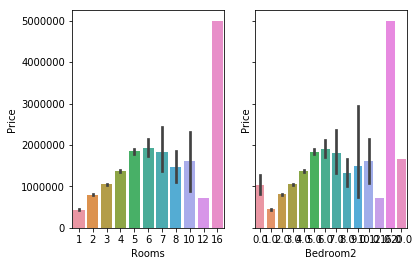

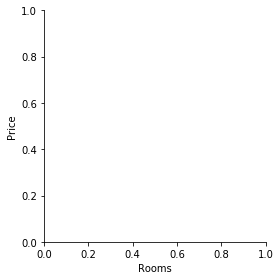

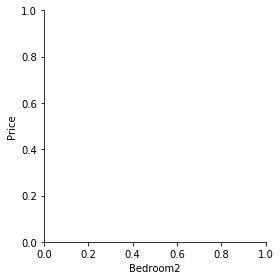

In [42]:
df_nobed= df[df.Bedroom2.notnull()]

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.factorplot(x="Rooms", y="Price",  data=df_nobed, kind="bar", ax = ax1)
sns.factorplot(x="Bedroom2", y="Price",  data=df_nobed, kind="bar",ax = ax2)
plt.show()


c:\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


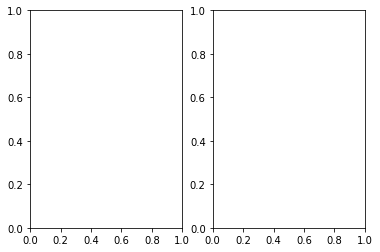

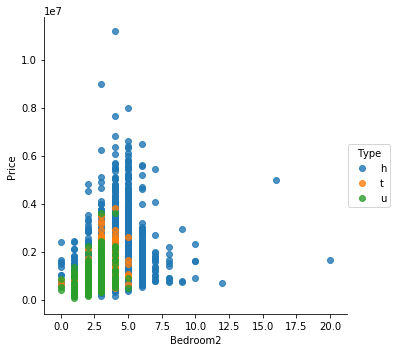

In [77]:
"""




fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.factorplot(x="Rooms", y="Price",  data=df_nobed, kind="bar", ax = ax1)
sns.factorplot(x="Bedroom2", y="Price",  data=df_nobed, kind="bar",ax = ax2)
fig.show()

"""
import matplotlib.pyplot as plt
fig, ax =plt.subplots(1,2)

#facet = sns.lmplot(data=df, x='Rooms', y='Price', hue='Regionname', fit_reg=False, legend=True, legend_out=True)
facet = sns.lmplot(data=df, x='Bedroom2', y='Price', hue='Type', 
                   fit_reg=False, legend=True, legend_out=True)

fig.show()


In [44]:
df.loc[df.Bathroom.isnull(), 'Bathroom']  = df.groupby('Rooms')['Bathroom'].transform(lambda x: x.fillna(x.mean()))
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [45]:
df.loc[df.Car.isnull(), 'Car']  = df.groupby('Type')['Car'].transform(lambda x: x.fillna(x.mean()))
df.loc[df.Landsize.isnull(), 'Landsize']  = df.groupby('Type')['Landsize'].transform(lambda x: x.fillna(x.mean()))

In [46]:

df.isnull().sum()


Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom             1
Car                  0
Landsize             0
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

In [47]:
#RegionName, Council Area, Property count- two rows which have all of these values as missing. No way to determine the values
df=df[df.Regionname.notnull()]

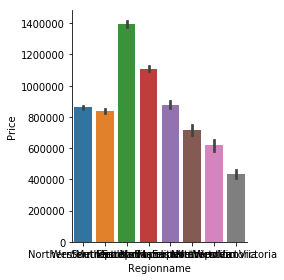

In [66]:
sns.factorplot(x="Type", y="
               
               ", hue="Method", data=df, kind="bar");

In [68]:
df.groupby('Regionname', as_index=False).agg({"Price": "mean"})

,Regionname,Price
0,Eastern Metropolitan,1.108723e+06
1,Eastern Victoria,7.143282e+05
2,Northern Metropolitan,8.614840e+05
3,Northern Victoria,6.190512e+05
4,South-Eastern Metropolitan,8.773078e+05
5,Southern Metropolitan,1.395928e+06
6,Western Metropolitan,8.376153e+05
7,Western Victoria,4.326068e+05


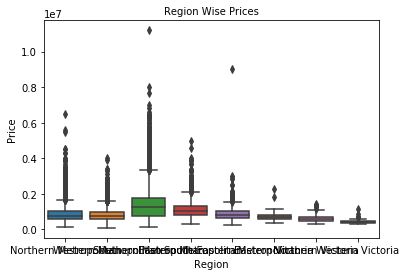

In [49]:
b=sns.boxplot(x="Regionname", y="Price", data=df, dodge=False);
b.axes.set_title("Region Wise Prices",fontsize=10)
b.set_xlabel("Region",fontsize=10)
b.set_ylabel("Price",fontsize=10)
b.tick_params(labelsize=10)

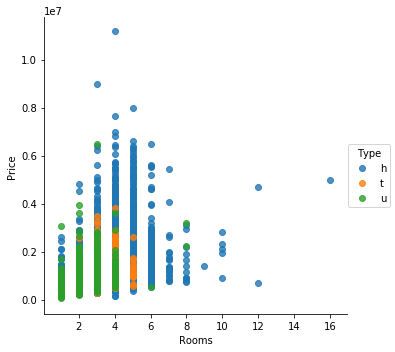

In [50]:
facet = sns.lmplot(data=df, x='Rooms', y='Price', hue='Type', 
                   fit_reg=False, legend=True, legend_out=True)

Preprocessing

In [51]:
df.groupby('Regionname')[['SellerG']].count()

,SellerG
Regionname,
Eastern Metropolitan,3272
Eastern Victoria,166
Northern Metropolitan,7864
Northern Victoria,166
South-Eastern Metropolitan,1341
Southern Metropolitan,8524
Western Metropolitan,5815
Western Victoria,96


In [73]:
df.groupby('Regionname', as_index=False).agg({"Car": "mean","Price": "mean","Rooms": "mean"})

,Regionname,Car,Price,Rooms
0,Eastern Metropolitan,1.837103,1.108723e+06,3.364914
1,Eastern Victoria,2.042169,7.143282e+05,3.518072
2,Northern Metropolitan,1.583800,8.614840e+05,2.804552
3,Northern Victoria,2.108434,6.190512e+05,3.457831
4,South-Eastern Metropolitan,1.930597,8.773078e+05,3.245522
5,Southern Metropolitan,1.633036,1.395928e+06,2.901807
6,Western Metropolitan,1.786758,8.376153e+05,3.076526
7,Western Victoria,2.031250,4.326068e+05,3.312500


In [79]:
# Group the data frame by month and item and extract a number of stats from each group
df.groupby(['Regionname']).agg({'Rooms':"mean",      # find the sum of the durations for each group
                                     'SellerG': "count" # find the number of network type entries
                                     })    # get the first date per group

,Rooms,SellerG
Regionname,,
Eastern Metropolitan,3.364914,3272
Eastern Victoria,3.518072,166
Northern Metropolitan,2.804552,7864
Northern Victoria,3.457831,166
South-Eastern Metropolitan,3.245522,1340
Southern Metropolitan,2.901807,8524
Western Metropolitan,3.076526,5815
Western Victoria,3.312500,96


In [54]:
df=df[df.Bathroom.notnull()]
df['Bathroom'] = df['Bathroom'].apply(lambda x: round(x))
df['Car'] = df['Car'].apply(lambda x: round(x))


27243

In [56]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          6437
Bathroom             0
Car                  0
Landsize             0
BuildingArea     16587
YearBuilt        15159
CouncilArea          0
Lattitude         6250
Longtitude        6250
Regionname           0
Propertycount        0
dtype: int64

c:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


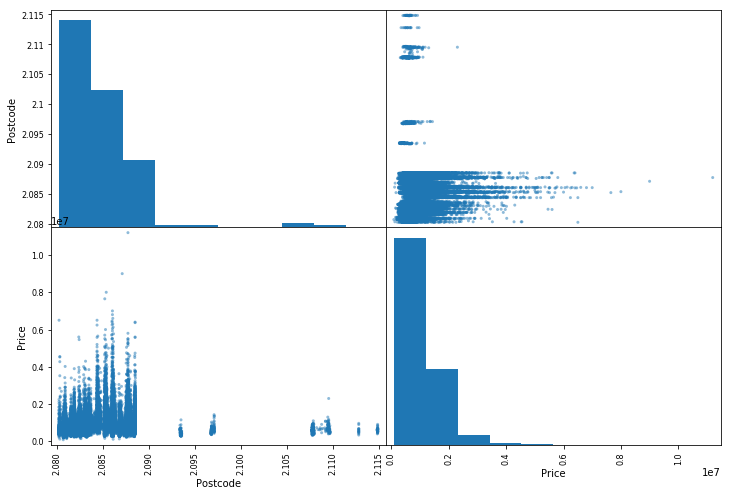

In [61]:
from pandas.tools.plotting import scatter_matrix

attributes = [ "Postcode", "Price"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.savefig('matrix.png')
plt.show()

In [76]:
# Get Months out of Dates
df['Date'] = pd.to_datetime(df['Date'])
column = df['Date']
fearure_col = pd.DataFrame({"month":column.dt.month})
df =  pd.concat([df,fearure_col], axis = 1)

In [70]:
len(df.Suburb.unique())

344

In [4]:
df = df.drop(['BuildingArea','Longtitude','YearBuilt','Lattitude','Bedroom2','Address','Postcode'], axis = 1)


In [5]:
df.to_csv('data_feature.csv', encoding='utf-8', index=False)


Clustering